In [ ]:
# we can start coding here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


# Set Pandas display options to show all columns and rows
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/Shareddrives/Humana_mays_Competetion/Data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_path+"Training_1005.csv")
print(df.shape)
print(df.columns)
df.head(5)

df_holdout = pd.read_csv(data_path+"Holdout_1005.csv")
print(df_holdout.shape)
print(df_holdout.columns)
df_holdout.head(5)

(1232, 68)
Index(['therapy_id', 'tgt_ade_dc_ind', 'race_cd', 'est_age', 'sex_cd',
       'cms_disabled_ind', 'cms_low_income_ind', 'n_rx_claims',
       'unique_ndc_id', 'pay_day_supply_cnt_min', 'pay_day_supply_cnt_avg',
       'pay_day_supply_cnt_max', 'rx_cost_sum', 'tot_drug_cost_accum_amt_max',
       'reversal_ind_sum', 'mail_order_ind_sum', 'generic_ind_sum',
       'maint_ind_sum', 'specialty_ind_sum', 'ddi_ind_sum', 'anticoag_ind_fst',
       'anticoag_ind_sum', 'anticoag_ind_lst', 'diarrhea_treat_ind_fst',
       'diarrhea_treat_ind_sum', 'diarrhea_treat_ind_lst',
       'nausea_treat_ind_fst', 'nausea_treat_ind_sum', 'nausea_treat_ind_lst',
       'seizure_treat_ind_fst', 'seizure_treat_ind_sum',
       'seizure_treat_ind_lst', 'ddi_after_therapy_sum',
       'anticoag_after_therapy_sum', 'diarrhea_after_therapy_sum',
       'nausea_after_therapy_sum', 'seizure_after_therapy_sum',
       'service_date_diff', 'n_med_claims', 'process_time_fst',
       'process_time_avg', 'pro

,id,therapy_id,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind,n_rx_claims,unique_ndc_id,pay_day_supply_cnt_min,pay_day_supply_cnt_avg,pay_day_supply_cnt_max,rx_cost_sum,tot_drug_cost_accum_amt_max,reversal_ind_sum,mail_order_ind_sum,generic_ind_sum,maint_ind_sum,specialty_ind_sum,ddi_ind_sum,anticoag_ind_fst,anticoag_ind_sum,anticoag_ind_lst,diarrhea_treat_ind_fst,diarrhea_treat_ind_sum,diarrhea_treat_ind_lst,nausea_treat_ind_fst,nausea_treat_ind_sum,nausea_treat_ind_lst,seizure_treat_ind_fst,seizure_treat_ind_sum,seizure_treat_ind_lst,ddi_after_therapy_sum,anticoag_after_therapy_sum,diarrhea_after_therapy_sum,nausea_after_therapy_sum,seizure_after_therapy_sum,service_date_diff,n_med_claims,process_time_fst,process_time_avg,process_time_lst,pot_fst,pot_lst,util_cat_fst,util_cat_lst,ade_diagnosis_sum,seizure_diagnosis_sum,pain_diagnosis_sum,fatigue_diagnosis_sum,nausea_diagnosis_sum,hyperglycemia_diagnosis_sum,constipation_diagnosis_sum,diarrhea_diagnosis_sum,ade_diagnosis_aft_sum,seizure_diagnosis_aft_sum,pain_diagnosis_aft_sum,fatigue_diagnosis_aft_sum,nausea_diagnosis_aft_sum,hyperglycemia_diagnosis_aft_sum,constipation_diagnosis_aft_sum,diarrhea_diagnosis_aft_sum,service_date_fst_start,service_date_lst_start,visit_date_fst_start,visit_date_lst_start,process_date_fst_start,process_date_lst_start
0,1018450235,1018450235-TAGRISSO-1,5.0,75.0,F,0.0,0.0,21.0,17.0,5.0,36.904762,90.0,30975.02,57625.40,0.0,4.0,15.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,74.0,48.0,66.081081,55.0,Physician_Office,Unknown,Physician_Office,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-76.0,35.0,-54.0,-109.0,-6.0,-54.0
1,1032849118,1032849118-TAGRISSO-1,1.0,91.0,F,0.0,0.0,17.0,10.0,5.0,66.000000,90.0,62873.54,78374.62,0.0,11.0,13.0,11.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,157.0,15.0,20.968153,14.0,Unknown,Outpatient,NaN,Outpatient,76.0,0.0,0.0,76.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-63.0,111.0,76.0,86.0,91.0,100.0
2,1044251683,1044251683-TAGRISSO-1,1.0,72.0,F,0.0,1.0,37.0,25.0,2.0,28.108108,90.0,67417.64,51822.31,0.0,4.0,30.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192.0,301.0,5.0,39.425249,13.0,Unknown,Unknown,NaN,NaN,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,-88.0,104.0,31.0,-7.0,36.0,6.0
3,1086171816,1086171816-TAGRISSO-1,1.0,67.0,F,0.0,1.0,30.0,21.0,1.0,23.466667,48.0,17082.28,18987.38,0.0,1.0,27.0,19.0,4.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,0.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90.0,5.0,NaN,NaN,NaN,NaN
4,1093074743,1093074743-TAGRISSO-1,1.0,67.0,M,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dropping id variable
df.drop(['therapy_id'],axis=1,inplace=True) #,'ade_diagnosis_sum'

#drop disparity variables
df.drop(['race_cd','sex_cd'],axis=1,inplace=True) #,'est_age','cms_disabled_ind','cms_low_income_ind'


# drop unnecessary variables
id = df_holdout['id'].values
df_holdout.drop(['id','therapy_id'],axis=1,inplace=True)

df_holdout.drop(['race_cd','sex_cd'],axis=1,inplace=True) #,'est_age','cms_disabled_ind','cms_low_income_ind'

## Correlation heatmap

<ipython-input-78-1f75656edd0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

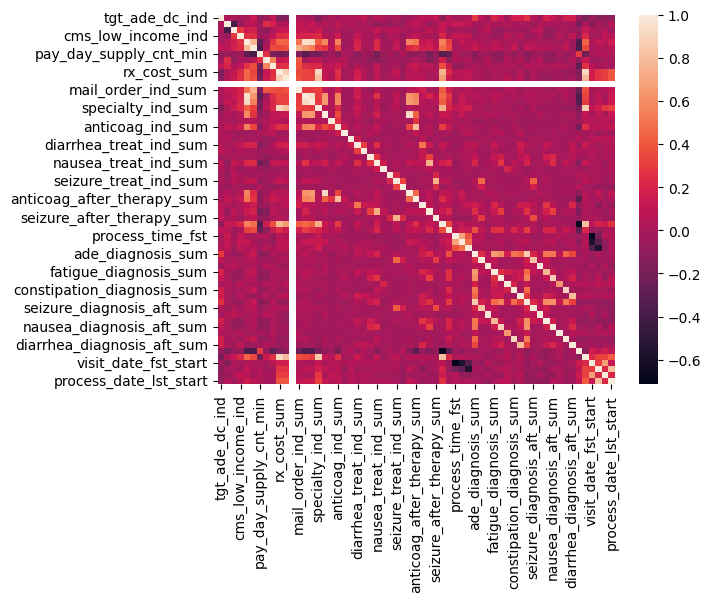

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)

## Handle Missing Values

In [ ]:
######################################    TRAIN    ###################################
cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0]
num_cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0 and df[col].dtype != 'O']
cat_cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0 and df[col].dtype == 'O']
print(cols_to_impute)
print(num_cols_to_impute)
print(cat_cols_to_impute)

# imputing with missing value indicators - simple imputer - numeric variables
from sklearn.impute import SimpleImputer
for col in num_cols_to_impute:

  ############ -10000 with missing indicator  ############
  imputer = SimpleImputer(strategy='constant', fill_value=-10000,add_indicator=True)
  # imputer = SimpleImputer(strategy='mean',add_indicator=True)
  temp = imputer.fit_transform(df[col].values.reshape(-1,1))
  df[col] = temp[:,0]
  df[col+'_Missing'] = temp[:,1]
  temp2 = imputer.transform(df_holdout[col].values.reshape(-1,1))
  df_holdout[col] = temp2[:,0]
  df_holdout[col+'_Missing'] = temp2[:,1]

  # df[col] = df[col].fillna(-10000)
  # df_holdout[col] = df_holdout[col].fillna(-10000)

  # df[col] = df[col].fillna(df[col].mean())
  # df_holdout[col] = df_holdout[col].fillna(df_holdout[col].mean())

for col in cat_cols_to_impute:
  df[col] = df[col].fillna('Unknown')
  df_holdout[col] = df_holdout[col].fillna('Unknown')


['est_age', 'cms_disabled_ind', 'cms_low_income_ind', 'n_rx_claims', 'unique_ndc_id', 'pay_day_supply_cnt_min', 'pay_day_supply_cnt_avg', 'pay_day_supply_cnt_max', 'rx_cost_sum', 'tot_drug_cost_accum_amt_max', 'reversal_ind_sum', 'mail_order_ind_sum', 'generic_ind_sum', 'maint_ind_sum', 'specialty_ind_sum', 'ddi_ind_sum', 'anticoag_ind_fst', 'anticoag_ind_sum', 'anticoag_ind_lst', 'diarrhea_treat_ind_fst', 'diarrhea_treat_ind_sum', 'diarrhea_treat_ind_lst', 'nausea_treat_ind_fst', 'nausea_treat_ind_sum', 'nausea_treat_ind_lst', 'seizure_treat_ind_fst', 'seizure_treat_ind_sum', 'seizure_treat_ind_lst', 'ddi_after_therapy_sum', 'anticoag_after_therapy_sum', 'diarrhea_after_therapy_sum', 'nausea_after_therapy_sum', 'seizure_after_therapy_sum', 'service_date_diff', 'n_med_claims', 'process_time_fst', 'process_time_avg', 'process_time_lst', 'pot_fst', 'pot_lst', 'util_cat_fst', 'util_cat_lst', 'ade_diagnosis_sum', 'seizure_diagnosis_sum', 'pain_diagnosis_sum', 'fatigue_diagnosis_sum', 'naus

<ipython-input-79-c0f55873cda2>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col+'_Missing'] = temp[:,1]
<ipython-input-79-c0f55873cda2>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col+'_Missing'] = temp[:,1]
<ipython-input-79-c0f55873cda2>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [ ]:
df.isna().sum().sum()

0

## Label Encoding

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
print(cat_cols)
for col in cat_cols:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  df_holdout[col] = label_encoder.transform(df_holdout[col])

['pot_fst', 'pot_lst', 'util_cat_fst', 'util_cat_lst']


## Train Test split

In [ ]:
df.columns

Index(['tgt_ade_dc_ind', 'est_age', 'cms_disabled_ind', 'cms_low_income_ind',
       'n_rx_claims', 'unique_ndc_id', 'pay_day_supply_cnt_min',
       'pay_day_supply_cnt_avg', 'pay_day_supply_cnt_max', 'rx_cost_sum',
       ...
       'nausea_diagnosis_aft_sum_Missing',
       'hyperglycemia_diagnosis_aft_sum_Missing',
       'constipation_diagnosis_aft_sum_Missing',
       'diarrhea_diagnosis_aft_sum_Missing', 'service_date_fst_start_Missing',
       'service_date_lst_start_Missing', 'visit_date_fst_start_Missing',
       'visit_date_lst_start_Missing', 'process_date_fst_start_Missing',
       'process_date_lst_start_Missing'],
      dtype='object', length=125)

In [ ]:
y = df['tgt_ade_dc_ind']
X = df.drop(['tgt_ade_dc_ind'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(862, 124) (862,)
(370, 124) (370,)


In [ ]:
y_train.value_counts()

0    780
1     82
Name: tgt_ade_dc_ind, dtype: int64

In [ ]:
((y_train==1).sum())/(y_train.shape[0])

0.0951276102088167

## Standard Scaler

In [ ]:
# ## Standard scaler only to be used while using logistic regression - only on numeric features
# num_features = [col for col in X_train.columns if X_train[col].dtype != 'O']
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train[num_features] = scaler.fit_transform(X_train[num_features])
# X_test[num_features] = scaler.transform(X_train[num_features])

## Data Balancing

In [ ]:
# #store list of categorical indices later for smoteNC
# categorical_indices = []
# for i, dtype in enumerate(X.dtypes):
#     if dtype == 'object':
#         categorical_indices.append(i)
# categorical_indices

# from imblearn.over_sampling import SMOTENC

# # Create an instance of SMOTENC
# smotenc = SMOTENC(sampling_strategy='auto', categorical_features=categorical_indices)

# # Apply SMOTENC to the dataset
# X_train, y_train = smotenc.fit_resample(X_train, y_train)
# print(y_train.value_counts())


In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
print(y_train.value_counts())

1    753
0    753
Name: tgt_ade_dc_ind, dtype: int64


## Logistic Regression

In [ ]:
# Create and train a classifier
clf = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=0.05)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

# Evaluate the classifier
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Calculate ROC AUC score
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
print("ROC AUC Score:", roc_auc_train)
print("ROC AUC Score:", roc_auc_test)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       753
           1       0.88      0.97      0.92       753

    accuracy                           0.92      1506
   macro avg       0.92      0.92      0.92      1506
weighted avg       0.92      0.92      0.92      1506

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       335
           1       0.38      0.86      0.53        35

    accuracy                           0.85       370
   macro avg       0.68      0.86      0.72       370
weighted avg       0.93      0.85      0.88       370

ROC AUC Score: 0.9606549455123287
ROC AUC Score: 0.9135181236673773


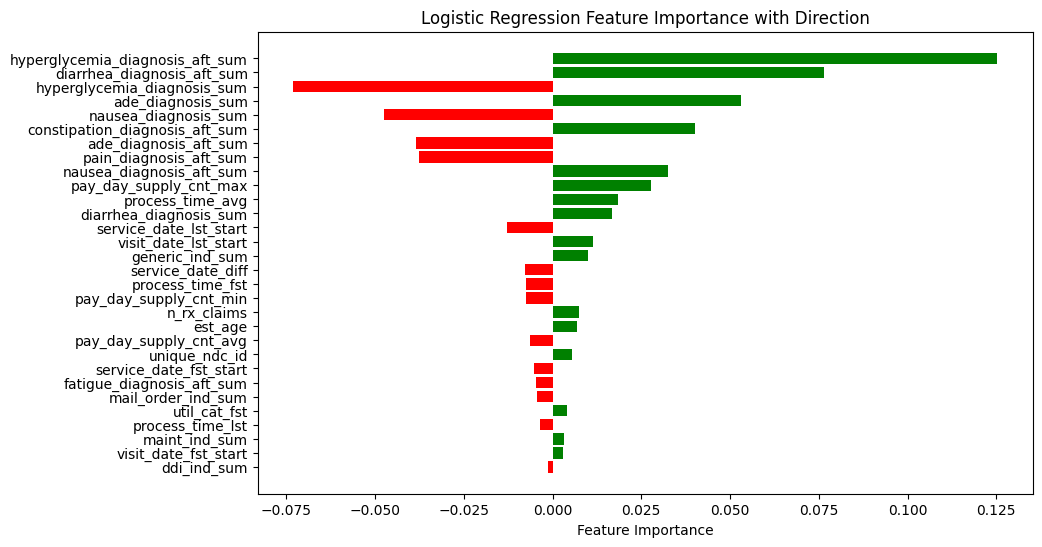

In [ ]:
# Get feature coefficients and names
coefficients = clf.coef_[0]
feature_names = X_train.columns

# Create a list of feature importance with directions
feature_importance = list(zip(feature_names, coefficients))

# Sort features by absolute coefficient values
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Select the top 30 features
feature_importance = feature_importance[:30]

# Separate features and their directions
sorted_features, sorted_directions = zip(*[(feat, direction) for feat, direction in feature_importance])

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_directions, color=[('green' if d > 0 else 'red') for d in sorted_directions])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance with Direction')
plt.gca().invert_yaxis()
plt.show()

124
124


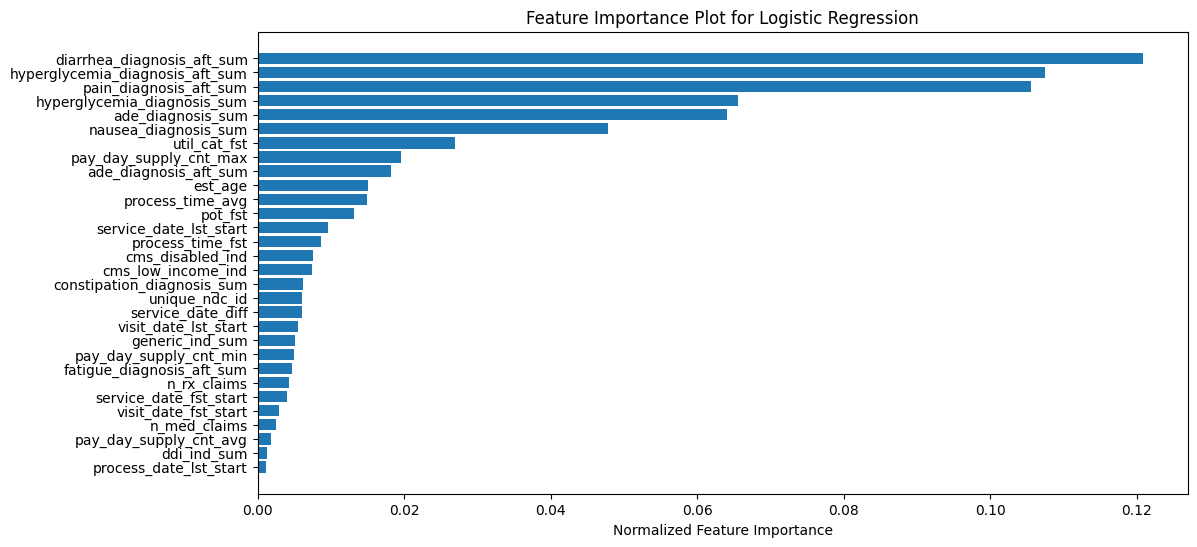

In [ ]:
# # import numpy as np
# # import matplotlib.pyplot as plt
# # import pandas as pd
# # from sklearn.linear_model import LogisticRegression

# # # # Assuming you have a DataFrame 'df' with your data

# # # Create and train the logistic regression classifier
# # clf = LogisticRegression(random_state=42)
# # clf.fit(X, y)

# # Get feature importances (coefficients)
# feature_importance = np.abs(clf.coef_[0])

# # Get the column names from your DataFrame
# feature_names = X_train.columns
# print(len(feature_importance))
# print(len(feature_names))
# # Create a DataFrame to store feature names and their importances
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# # Sort the DataFrame by importance (in descending order)
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# # Select the top 30 features
# top_30_features = feature_importance_df.head(30)
# # Create a bar plot to visualize the feature importances
# plt.figure(figsize=(12, 6))
# plt.barh(range(len(top_30_features)), top_30_features['Importance'], align='center')
# plt.yticks(range(len(top_30_features)), top_30_features['Feature'])
# plt.xlabel('Normalized Feature Importance')
# plt.title('Feature Importance Plot for Logistic Regression')
# plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
# plt.show()

## Random Forest

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [5, 10, 20, 50, 100, 200],
#     'max_depth': [5, 10, 20, 30],
#     # 'min_samples_split': [2, 5, 10],
#     # 'min_samples_leaf': [1, 2, 4],
# }

# rf_classifier = RandomForestClassifier( random_state=42)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to your data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print(best_params)

In [ ]:
# # Train a Random Forest classifier
# clf = RandomForestClassifier( random_state=42, max_depth=30, n_estimators=100) #, max_depth=30, n_estimators=100
# clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_train_pred = clf.predict(X_train)
# y_test_pred = clf.predict(X_test)
# y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
# y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

# # Evaluate the classifier
# print(classification_report(y_train, y_train_pred))
# print(classification_report(y_test, y_test_pred))

# # Calculate ROC AUC score
# roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
# roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
# print("ROC AUC Score:", roc_auc_train)
# print("ROC AUC Score:", roc_auc_test)

In [ ]:
# # Get feature importances
# feature_importances = clf.feature_importances_


# # Create a DataFrame to store feature names and their importances
# feature_names = X_train.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# # Sort the DataFrame by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Select the top 30 features
# top_30_features = feature_importance_df.head(30)

# # Plot the top 30 important features
# plt.figure(figsize=(12, 8))
# plt.barh(top_30_features['Feature'], top_30_features['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Name')
# plt.title('Top 30 Important Features')
# plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
# plt.show()


## XGBoost

In [ ]:
# import xgboost as xgb
# clf_xgb = xgb.XGBClassifier()
# clf_xgb.fit(X_train, y_train)

# # Make predictions on the test set
# y_train_pred = clf_xgb.predict(X_train)
# y_test_pred = clf_xgb.predict(X_test)
# y_train_pred_prob = clf_xgb.predict_proba(X_train)[:, 1]
# y_test_pred_prob = clf_xgb.predict_proba(X_test)[:, 1]

# # Evaluate the classifier
# print(classification_report(y_train, y_train_pred))
# print(classification_report(y_test, y_test_pred))

# # Calculate ROC AUC score
# roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
# roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
# print("ROC AUC Score:", roc_auc_train)
# print("ROC AUC Score:", roc_auc_test)

## Train final model on all the dataset

## Use final model to predict on holdout sample

###Heyy I added this :)

In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier

# clf = HistGradientBoostingClassifier()
# clf.fit(X_train, y_train)
# y_holdout_pred = clf.predict(df_holdout)

### c

In [ ]:
# predict using random forest model
# Make predictions on the holdout set
y_holdout_pred = clf.predict(df_holdout)
y_holdout_pred_prob = clf.predict_proba(df_holdout)[:, 1]

In [ ]:
print(y_holdout_pred.shape)
(y_holdout_pred==1).sum()/y_holdout_pred.shape[0]

(420,)


0.3523809523809524

In [ ]:
submission = pd.DataFrame({'ID': id, 'SCORE': y_holdout_pred_prob})

#create RANK column
submission['RANK'] = submission['SCORE'].rank(method = 'dense', ascending=False) - 1

In [ ]:
submission['SCORE'].values

array([7.70601104e-001, 9.96263496e-001, 6.63464193e-001, 1.65219497e-271,
       8.93396966e-272, 2.40557748e-272, 7.56156967e-001, 6.74784622e-001,
       1.23556310e-271, 5.90512021e-272, 7.89372908e-001, 2.61658122e-271,
       7.68432030e-001, 5.08196538e-273, 2.61762830e-272, 7.62314124e-001,
       6.31010982e-273, 7.20419834e-272, 9.11919049e-001, 7.20190853e-272,
       4.75205880e-272, 1.55195590e-272, 5.82212523e-273, 6.99909000e-001,
       8.82777580e-272, 4.92055206e-001, 4.04393219e-271, 3.16968981e-272,
       1.33462796e-271, 4.05443862e-271, 4.57759963e-001, 5.44377384e-001,
       5.91192153e-272, 1.77571776e-272, 3.12813909e-271, 9.39529820e-001,
       8.98433448e-001, 2.94844081e-271, 1.93112644e-271, 8.72277250e-002,
       2.01023807e-271, 8.33046084e-272, 4.36113326e-271, 7.40225196e-272,
       4.45942461e-001, 8.72272659e-272, 2.69865846e-272, 6.16349701e-001,
       4.52721802e-001, 7.69721211e-001, 2.02013088e-271, 9.20565388e-001,
       1.42999330e-271, 9

In [ ]:
submission['RANK'].values

array([ 82.,   2., 119., 239., 299., 363.,  89., 118., 270., 329.,  75.,
       222.,  85., 391., 357.,  88., 386., 318.,  25., 319., 339., 374.,
       389., 112., 301., 149., 197., 350., 261., 196., 153., 142., 328.,
       372., 213.,  13.,  33., 219., 231., 182., 229., 309., 191., 316.,
       157., 304., 356., 127., 154.,  83., 228.,  21., 256.,   7.,  29.,
       214., 361.,  61.,  67., 133.,  99., 170.,   8., 140., 342., 352.,
       199.,  58., 158., 346., 220., 273.,   0., 257.,  79.,  90., 361.,
       120., 291.,   5., 283.,  76., 269., 217., 125., 306., 202., 152.,
       382.,  86.,  24.,  18., 333.,  22.,  68., 361., 308.,  87., 242.,
       163., 108., 139., 275., 290., 334.,  36., 246.,  30.,  98., 250.,
       172., 380., 211.,  53., 285., 331., 300., 376., 194., 396., 247.,
       103., 297., 223., 186., 255., 180., 311., 395., 237.,  42., 349.,
       378., 176., 361., 190.,  20., 185., 165., 264., 238.,  81., 381.,
       344., 392.,  96., 203., 293., 262., 361., 27

In [ ]:
submission.head(5)

,ID,SCORE,RANK
0,1018450235,7.706011e-01,82.0
1,1032849118,9.962635e-01,2.0
2,1044251683,6.634642e-01,119.0
3,1086171816,1.652195e-271,239.0
4,1093074743,8.933970e-272,299.0


In [ ]:
submission.shape

(420, 3)

In [ ]:
# submission.to_csv('/content/drive/Shareddrives/Humana_mays_Competetion/Data/2023CaseCompetition_Geethasree_MadirajuNagaraju_20231005.csv',index=False)